### Bivariate Plots

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
fuel_econ = pd.read_csv("fuel-econ.csv")
print(fuel_econ.shape)
fuel_econ.head(3)

(3929, 20)


,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5


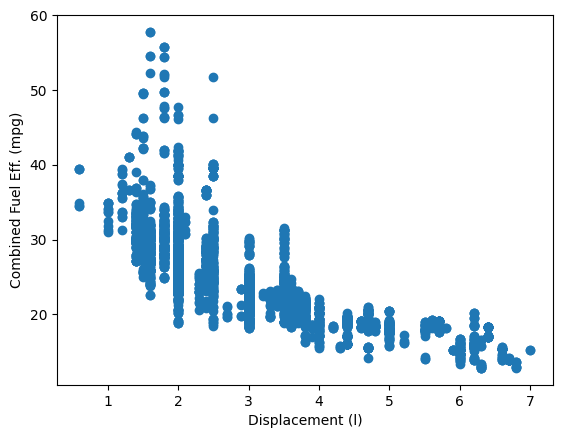

In [4]:
plt.scatter(data=fuel_econ, x='displ', y='comb'); 
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)');

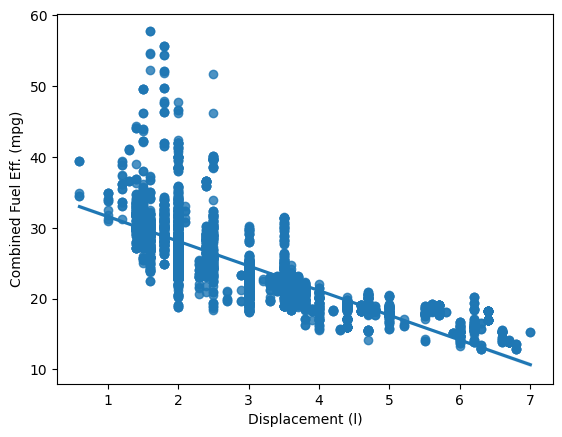

In [5]:
sns.regplot(data=fuel_econ, x='displ', y='comb');
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

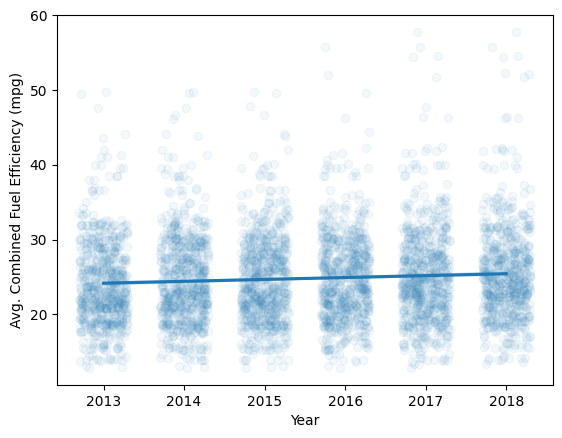

In [6]:
sns.regplot(data=fuel_econ, x='year', y='comb', x_jitter=0.3, scatter_kws={'alpha':1/20});
plt.xlabel('Year');
plt.ylabel('Avg. Combined Fuel Efficiency (mpg)');

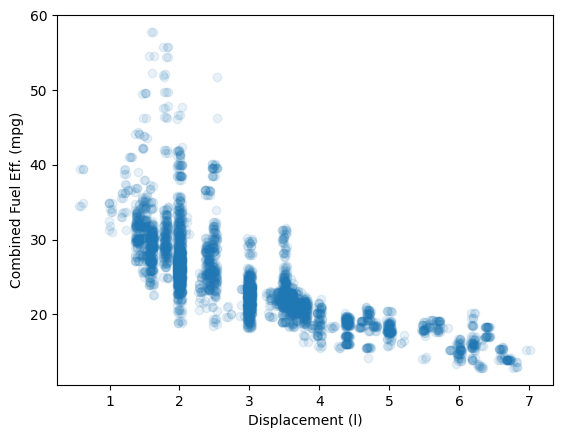

In [7]:
sns.regplot(data=fuel_econ, x='displ', y='comb', x_jitter=0.04, fit_reg=False, 
            scatter_kws={'alpha':1/10});
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

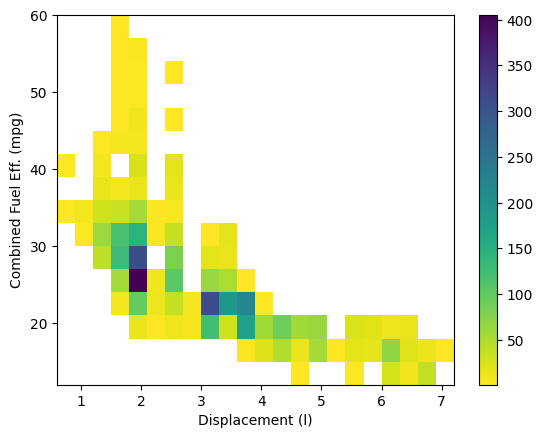

In [8]:
x_bins = np.arange(0.6, 7+0.3, 0.3)
y_bins = np.arange(12, 58+3, 3)

plt.hist2d(data=fuel_econ, x='displ', y='comb', cmin=0.5, cmap='viridis_r', bins=[x_bins, y_bins]);
plt.colorbar();
plt.xlabel('Displacement (l)');
plt.ylabel('Combined Fuel Eff. (mpg)');

In [9]:
fuel_econ[['displ', 'comb']].describe()

,displ,comb
count,3929.000000,3929.000000
mean,2.950573,24.791339
std,1.305901,6.003246
min,0.600000,12.821700
25%,2.000000,20.658100
50%,2.500000,24.000000
75%,3.600000,28.227100
max,7.000000,57.782400


In [10]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)

fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses)

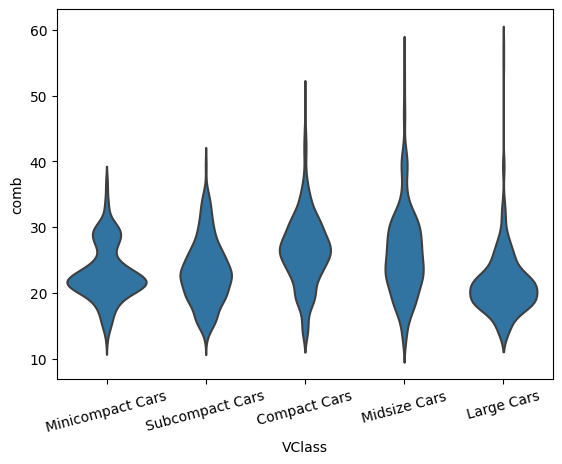

In [11]:
base_color = sns.color_palette()[0]

sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner=None);
plt.xticks(rotation=15);

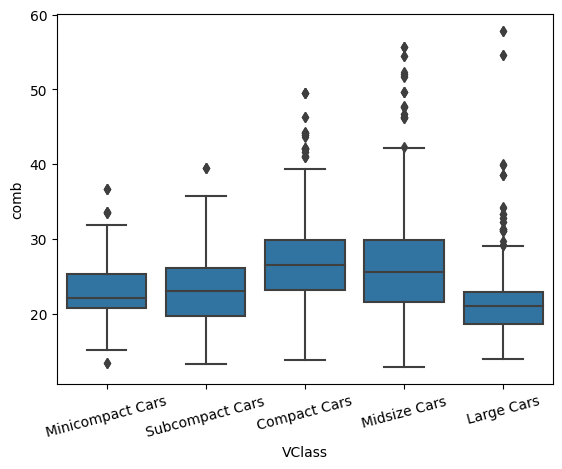

In [12]:
base_color = sns.color_palette()[0]

sns.boxplot(data=fuel_econ, x='VClass', y='comb',
               color=base_color)
plt.xticks(rotation=15);

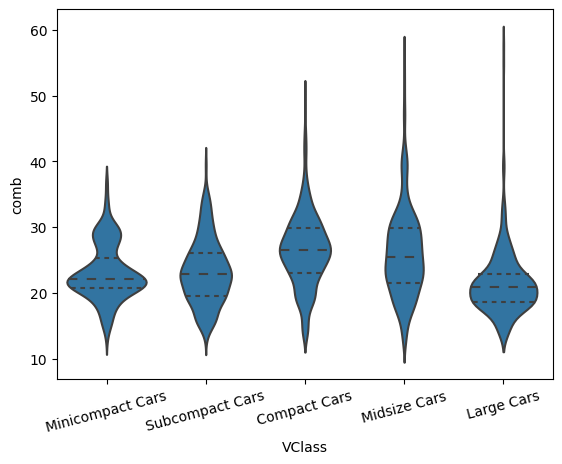

In [13]:
base_color = sns.color_palette()[0]

sns.violinplot(data=fuel_econ, x='VClass', y='comb', color=base_color, inner='quartile');
plt.xticks(rotation=15);

In [14]:
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x: x.split()[0])

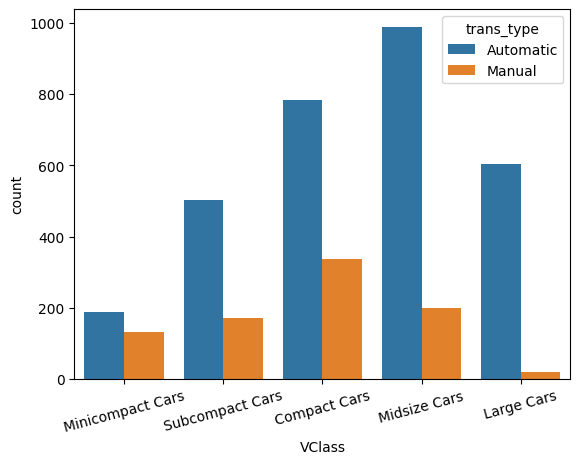

In [33]:
sns.countplot(data=fuel_econ, x='VClass', hue='trans_type')
plt.xticks(rotation=15);

/home/awais/.local/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


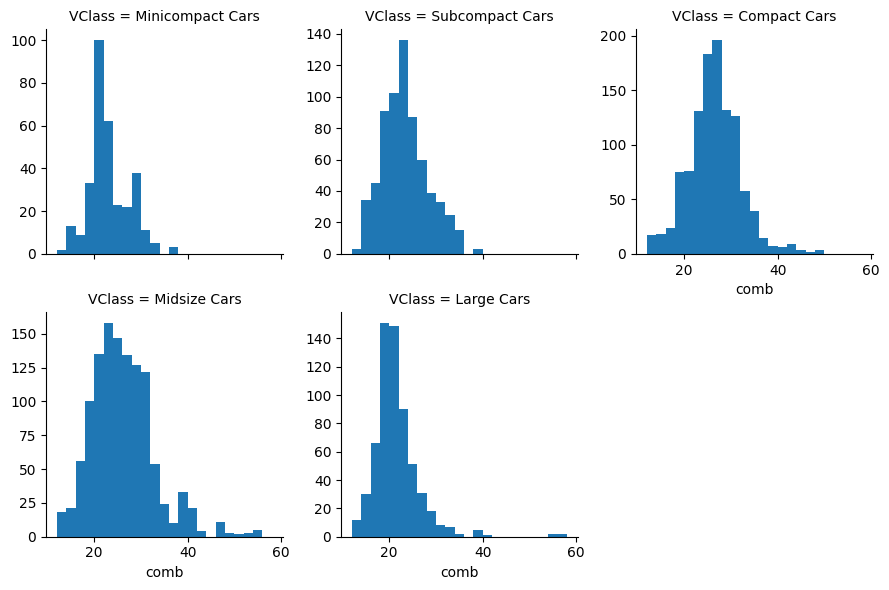

In [43]:
bins = np.arange(12, 58+2, 2)
g =  sns.FacetGrid(data=fuel_econ, col='VClass', col_wrap=3, sharey=False);
g.map(plt.hist, 'comb', bins=bins);

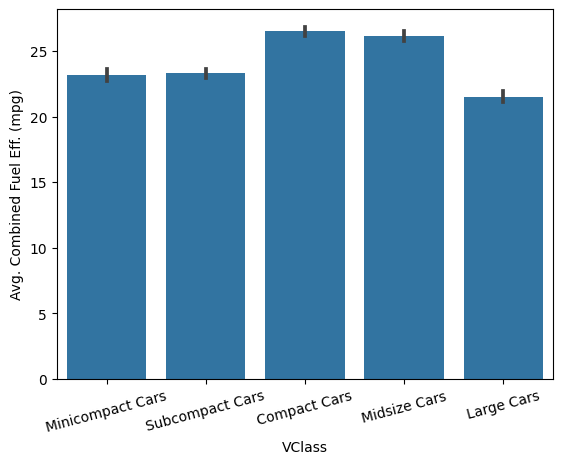

In [45]:
sns.barplot(data=fuel_econ, x='VClass', y='comb');
plt.xticks(rotation=15);
plt.ylabel('Avg. Combined Fuel Eff. (mpg)');